In [1]:
import pandas as pd

df_en = pd.read_csv("./data/dataset_meta/dataset_meta_en.csv")
df_ko = pd.read_csv("./data/dataset_meta/dataset_meta_ko.csv")
df_ja = pd.read_csv("./data/dataset_meta/dataset_meta_ja.csv")
df_zh = pd.read_csv("./data/dataset_meta/dataset_meta_zh.csv")

print("df_ko:", df_ko.shape)
print("df_en:", df_en.shape)
print("df_zh:", df_zh.shape)
print("df_ja:", df_ja.shape)

# cutoff 700 datasets
df_en = df_en.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)[:700]
df_ko = df_ko.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)[:700]
df_ja = df_ja.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)[:700]
df_zh = df_zh.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)[:700]

df_all = pd.concat([df_en, df_ko, df_ja, df_zh], ignore_index=True).drop_duplicates(subset=['id'])
print("df_all:", df_all.shape)


df_ko: (747, 23)
df_en: (736, 23)
df_zh: (748, 23)
df_ja: (746, 23)
df_all: (2277, 23)


## Data Distribution

Monolingual datasets:
Korean only: 371
Japanese only: 334
Chinese only: 271

Intersections:
Korean + Japanese: 34
Korean + Chinese: 29
Japanese + Chinese: 63
All three languages: 179


/tmp/ipykernel_218091/2700367570.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mono_ko = df_all[df_all['language_category'] == 'mono'][df_all['languages'].apply(lambda x: is_exact_mono(x, 'ko'))].shape[0]
/tmp/ipykernel_218091/2700367570.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mono_ja = df_all[df_all['language_category'] == 'mono'][df_all['languages'].apply(lambda x: is_exact_mono(x, 'ja'))].shape[0]
/tmp/ipykernel_218091/2700367570.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mono_zh = df_all[df_all['language_category'] == 'mono'][df_all['languages'].apply(lambda x: is_exact_mono(x, 'zh'))].shape[0]


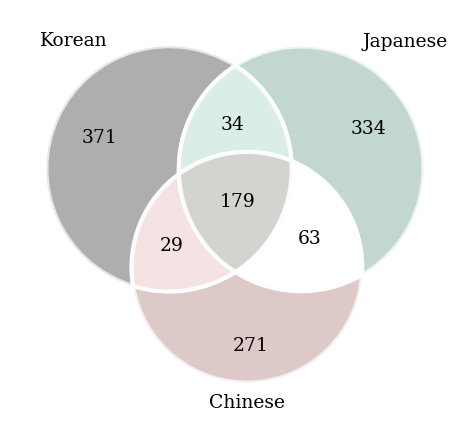

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

plt.rcParams['font.family'] = 'serif'

def is_exact_mono(languages_str, target_lang):
    if pd.isna(languages_str):
        return False
    languages = set(str(languages_str).split(', '))
    return languages == {target_lang}

def has_languages(languages_str, target_langs):
    if pd.isna(languages_str):
        return False
    languages = set(str(languages_str).split(', '))
    return all(lang in languages for lang in target_langs)

mono_ko = df_all[df_all['language_category'] == 'mono'][df_all['languages'].apply(lambda x: is_exact_mono(x, 'ko'))].shape[0]
mono_ja = df_all[df_all['language_category'] == 'mono'][df_all['languages'].apply(lambda x: is_exact_mono(x, 'ja'))].shape[0]
mono_zh = df_all[df_all['language_category'] == 'mono'][df_all['languages'].apply(lambda x: is_exact_mono(x, 'zh'))].shape[0]

ko_ja = df_all[df_all['languages'].apply(lambda x: has_languages(x, ['ko', 'ja']) and not has_languages(x, ['zh']))].shape[0]
ko_zh = df_all[df_all['languages'].apply(lambda x: has_languages(x, ['ko', 'zh']) and not has_languages(x, ['ja']))].shape[0]
ja_zh = df_all[df_all['languages'].apply(lambda x: has_languages(x, ['ja', 'zh']) and not has_languages(x, ['ko']))].shape[0]
ko_ja_zh = df_all[df_all['languages'].apply(lambda x: has_languages(x, ['ko', 'ja', 'zh']))].shape[0]

print("Monolingual datasets:")
print(f"Korean only: {mono_ko}")
print(f"Japanese only: {mono_ja}")
print(f"Chinese only: {mono_zh}")

print("\nIntersections:")
print(f"Korean + Japanese: {ko_ja}")
print(f"Korean + Chinese: {ko_zh}")
print(f"Japanese + Chinese: {ja_zh}")
print(f"All three languages: {ko_ja_zh}")

fig = plt.figure(figsize=(4, 3), dpi=150, facecolor='white')  
ax = plt.gca()
ax.set_facecolor('white')  

v = venn3(
    subsets=(mono_ko, mono_ja, ko_ja, mono_zh, ko_zh, ja_zh, ko_ja_zh),
    set_labels=('Korean', 'Japanese', 'Chinese'),
    set_colors=('#8C8C8C', '#A8C6BA', '#D1B3B3'),
    alpha=0.9
)

for label in v.set_labels:
    label.set_fontsize(9)
    label.set_color('black')  

for subset in v.subset_labels:
    if subset:
        subset.set_fontsize(9)
        subset.set_color('black') 

plt.tight_layout(pad=1.0)

for idx, subset in enumerate(['100', '010', '110', '001', '101', '011', '111']):
    if v.get_patch_by_id(subset):
        v.get_patch_by_id(subset).set_edgecolor('white')
        v.get_patch_by_id(subset).set_linewidth(2)
        v.get_patch_by_id(subset).set_alpha(0.9 if subset in ['110', '101', '011', '111'] else 0.7)

plt.savefig('./figures/language_distribution1.pdf', 
            format='pdf', 
            dpi=300, 
            bbox_inches='tight',  
            pad_inches=0.1,       
            facecolor='white')    

plt.show()


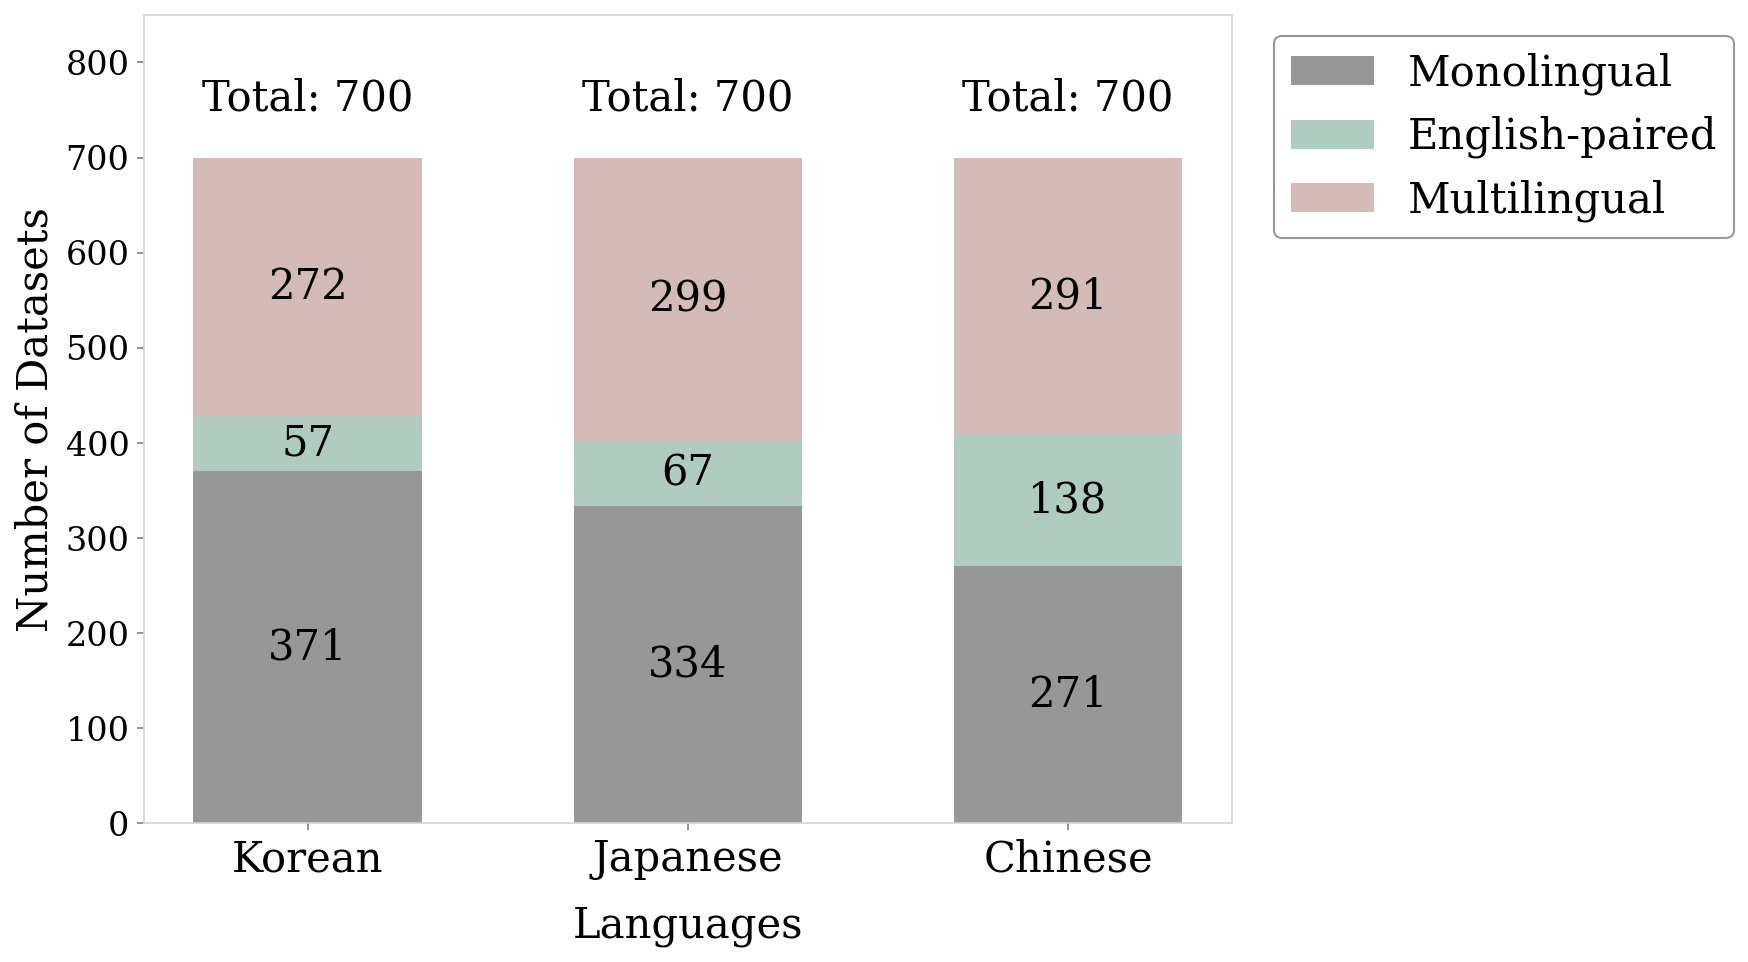

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 20

def is_exact_languages(languages_str, target_langs):
    if pd.isna(languages_str):
        return False
    languages = set(str(languages_str).split(', '))
    return languages == set(target_langs)

languages = ['ko', 'ja', 'zh']
dfs = {'ko': df_ko, 'ja': df_ja, 'zh': df_zh}
mono_counts = []
mono_en_counts = []
multi_counts = []
total_counts = []

for lang in languages:
    total = len(dfs[lang])
    total_counts.append(total)
    mono = dfs[lang][dfs[lang]['languages'].apply(lambda x: is_exact_languages(x, [lang]))].shape[0]
    mono_counts.append(mono)
    mono_en = dfs[lang][dfs[lang]['languages'].apply(lambda x: is_exact_languages(x, [lang, 'en']))].shape[0]
    mono_en_counts.append(mono_en)
    multi = total - mono - mono_en
    multi_counts.append(multi)

fig = plt.figure(figsize=(10, 7), dpi=150, facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

x = np.arange(len(languages))
width = 0.6

colors = ['#8C8C8C',  
          '#A8C6BA',  
          '#D1B3B3'] 

plt.ylim(0, 850)

plt.bar(x, mono_counts, width, label='Monolingual', color=colors[0], alpha=0.9)
plt.bar(x, mono_en_counts, width, bottom=mono_counts, label='English-paired', color=colors[1], alpha=0.9)
plt.bar(x, multi_counts, width, bottom=np.array(mono_counts) + np.array(mono_en_counts), 
        label='Multilingual', color=colors[2], alpha=0.9)

for spine in ax.spines.values():
    spine.set_color('lightgray')  
    spine.set_linewidth(0.8)  

ax.tick_params(axis='both', colors='gray')

plt.xlabel('Languages', labelpad=12, fontsize=20, color='black')  
plt.ylabel('Number of Datasets', fontsize=20, color='black')  

plt.xticks(x, ['Korean', 'Japanese', 'Chinese'], fontsize=20, color='black')  
plt.yticks(fontsize=16, color='black')  

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=20, 
           facecolor='white', edgecolor='gray', labelcolor='black')  

for i in range(len(languages)):
    if mono_counts[i] > 0:
        plt.text(i, mono_counts[i]/2, str(mono_counts[i]), 
                ha='center', va='center', color='black', fontsize=20)
    
    if mono_en_counts[i] > 0:
        plt.text(i, mono_counts[i] + mono_en_counts[i]/2, 
                str(mono_en_counts[i]), ha='center', va='center', color='black', fontsize=20)
    
    if multi_counts[i] > 0:
        plt.text(i, mono_counts[i] + mono_en_counts[i] + multi_counts[i]/2,
                str(multi_counts[i]), ha='center', va='center', color='black', fontsize=20)
    
    plt.text(i, total_counts[i] + 40, f'Total: {total_counts[i]}', 
            ha='center', va='bottom', color='black', fontsize=20)

plt.subplots_adjust(right=0.85)

plt.savefig('./figures/language_distribution2.pdf', 
            format='pdf', 
            dpi=300, 
            bbox_inches='tight',  
            pad_inches=0.1,      
            facecolor='white')

plt.show()

## Download Trend

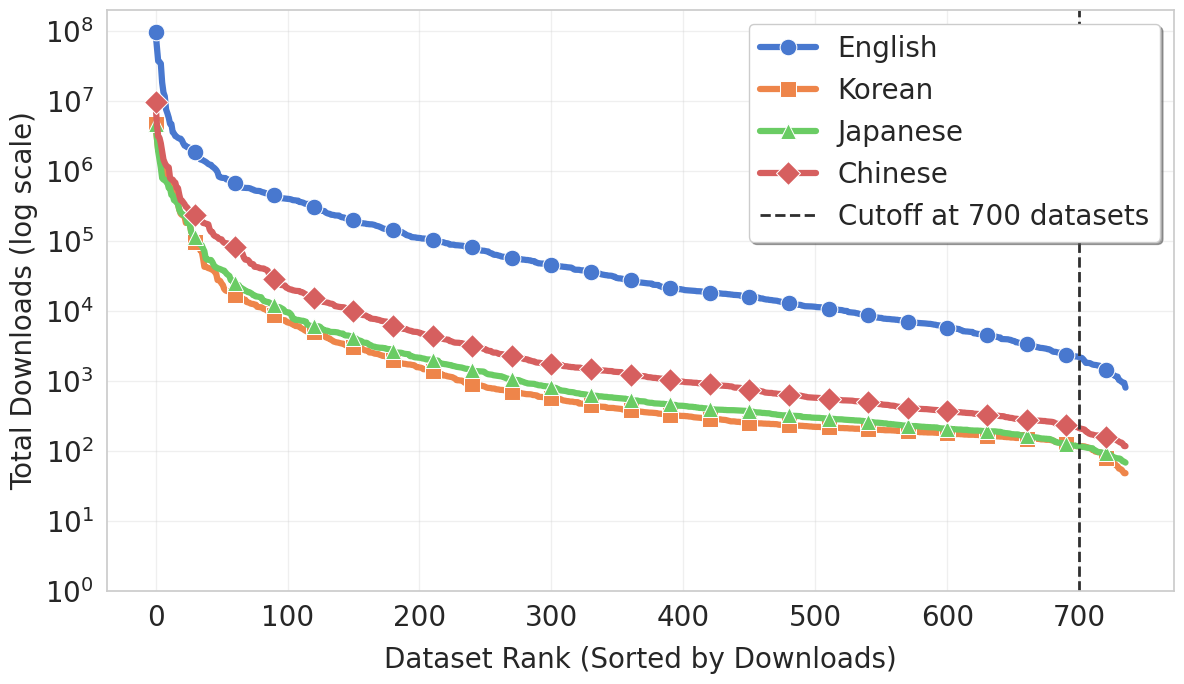

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_en = pd.read_csv("./data/dataset_meta/dataset_meta_en.csv")
df_ko = pd.read_csv("./data/dataset_meta/dataset_meta_ko.csv")
df_ja = pd.read_csv("./data/dataset_meta/dataset_meta_ja.csv")
df_zh = pd.read_csv("./data/dataset_meta/dataset_meta_zh.csv")

df_en_sorted = df_en.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)
df_zh_sorted = df_zh.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)
df_ja_sorted = df_ja.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)
df_ko_sorted = df_ko.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)

plot_n = 736
cutoff_n = 700

sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

colors = ['#4878CF', '#EE854A', '#6ACC64', '#D65F5F']
markers = ['o', 's', '^', 'D']
labels = ['English', 'Korean', 'Japanese', 'Chinese']
datasets = [df_en_sorted, df_ko_sorted, df_ja_sorted, df_zh_sorted]

for idx, (df, color, marker, label) in enumerate(zip(datasets, colors, markers, labels)):
    sns.lineplot(x=df.index[:plot_n], y=df["downloads_alltime"][:plot_n], 
                 label=label, marker=marker, markersize=12, 
                 color=color, linewidth=4.5, markevery=30)

plt.axvline(x=cutoff_n, color="#2F2F2F", linestyle='--', linewidth=2.0, label="Cutoff at 700 datasets")
plt.yscale('log')
plt.ylim(bottom=1)
plt.xlabel("Dataset Rank (Sorted by Downloads)", fontsize=20, labelpad=10)
plt.ylabel("Total Downloads (log scale)", fontsize=20, labelpad=5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig("./figures/download_trends_700_cutoff.pdf", bbox_inches="tight", dpi=400, facecolor='white')
plt.show()


## Task Distrivution

In [ ]:
task_groups = {
    'Text Generation': ['text-generation', 'text2text-generation', 'language-modeling',
                    'fill-mask', 'masked-language-modeling', 'dialogue-modeling',
                    'masked-auto-encoding', 'rendered-language-modelling', 'dialogue-generation',
                    'conditional-text-generation'],
    
    'Question Answering': ['question-answering', 'multiple-choice', 'open-domain-qa',
                        'closed-domain-qa', 'extractive-qa', 'visual-question-answering',
                        'table-question-answering', 'document-question-answering',
                        'abstractive-qa', 'multiple-choice-qa'],
    
    'Classification': ['text-classification', 'sentiment-classification', 'sentiment-analysis',
                    'topic-classification', 'natural-language-inference',
                    'intent-classification', 'zero-shot-classification',
                    'multi-class-classification', 'multi-label-classification',
                    'binary-classification', 'hate-speech-detection'],
    
    'Translation': ['translation', 'parsing', 'machine-translation'],
    
    'Summarization': ['summarization', 'news-articles-summarization'],
    
    'Token & Feature': ['token-classification', 'named-entity-recognition', 
                     'feature-extraction', 'sentence-similarity',
                     'text-simplification', 'semantic-similarity-scoring',
                     'part-of-speech', 'image-feature-extraction'],
    
    'Vision & Image': ['image-to-text', 'text-to-image', 'image-classification', 
                    'zero-shot-image-classification', 'image-generation',
                    'image-to-image', 'image-to-3d', 'image-captioning',
                    'object-detection', 'image-segmentation', 'image-text-to-text'],
    
    'Video & Audio': ['video-classification', 'text-to-video', 'video-text-to-text',
                    'audio-classification', 'text-to-speech', 'text-to-audio',
                    'automatic-speech-recognition', 'audio-to-audio', 'audio-text-to-text',
                    'image-to-video'],
    
    'Retrieval': ['text-retrieval', 'document-retrieval', 'zero-shot-retrieval',
                'information-retrieval', 'passage-retrieval', 'tweet-retrieval',
                'argument-retrieval', 'news-retrieval', 'entity-linking-retrieval',
                'Knowledge-retrieval', 'text-retrieval-other-text-image-retrieval'],
    
    'Tabular & Time Series': ['tabular-classification', 'tabular-regression', 
                           'tabular-to-text', 'table-to-text', 'time-series-forecasting'],
    
    'Conversational': ['conversational', 'dialogue-generation'],
    
    '3D & Robotics': ['text-to-3d', 'keypoint-detection', 'pose-estimation', 'robotics'],
    
    'Other': ['reinforcement-learning', 'text-scoring', 'other']
}

def analyze_tasks(df):
    all_tasks = []
    for tasks in df['tasks'].dropna():
        task_list = tasks.split(', ')
        all_tasks.extend(task_list)
    
    grouped_counts = {group: 0 for group in task_groups.keys()}  
    
    for task in all_tasks:
        grouped = False
        for group, tasks in task_groups.items():
            if any(t in task.lower() for t in tasks):
                grouped_counts[group] = grouped_counts.get(group, 0) + 1
                grouped = True
                break
        if not grouped:
            grouped_counts['Other'] = grouped_counts.get('Other', 0) + 1
    
    return grouped_counts

en_tasks = analyze_tasks(df_en)
ko_tasks = analyze_tasks(df_ko)
ja_tasks = analyze_tasks(df_ja)
zh_tasks = analyze_tasks(df_zh)

categories = list(task_groups.keys())

In [19]:
df_en = pd.read_csv("./data/dataset_meta/dataset_meta_en.csv")
df_ko = pd.read_csv("./data/dataset_meta/dataset_meta_ko.csv")
df_ja = pd.read_csv("./data/dataset_meta/dataset_meta_ja.csv")
df_zh = pd.read_csv("./data/dataset_meta/dataset_meta_zh.csv")

df_en = df_en.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)[:700]
df_ko = df_ko.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)[:700]
df_ja = df_ja.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)[:700]
df_zh = df_zh.sort_values(by="downloads_alltime", ascending=False).reset_index(drop=True)[:700]

df_en = df_en[df_en['language_category'] == "mono"]
df_ko = df_ko[df_ko['language_category'] == "mono"]
df_ja = df_ja[df_ja['language_category'] == "mono"]
df_zh = df_zh[df_zh['language_category'] == "mono"]

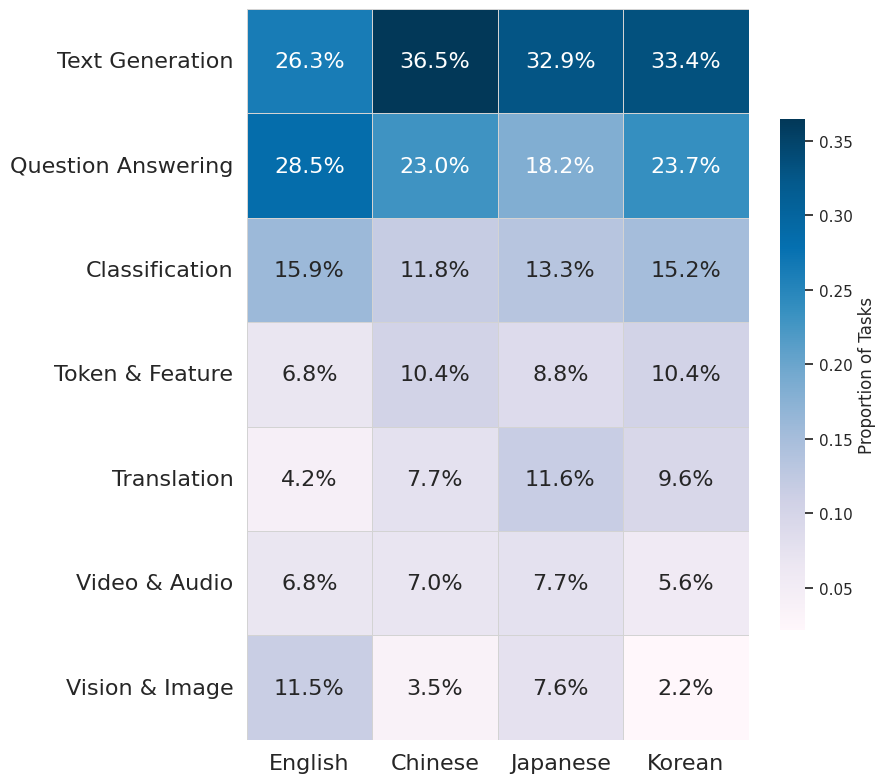

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.titlesize'] = 18  
plt.rcParams['axes.labelsize'] = 16   
plt.rcParams['xtick.labelsize'] = 14  
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['legend.fontsize'] = 14  

top_categories = sorted(categories, 
                       key=lambda x: sum([en_tasks[x], zh_tasks[x], ja_tasks[x], ko_tasks[x]]), 
                       reverse=True)[:7]

data = []
for cat in top_categories:
    data.append([en_tasks[cat], zh_tasks[cat], ja_tasks[cat], ko_tasks[cat]])

data_normalized = np.array(data)
data_normalized = data_normalized / data_normalized.sum(axis=0)

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_normalized = np.array(data) / np.array(data).sum(axis=0)

sns.set(style="whitegrid")
plt.figure(figsize=(9, 8)) 

ax = sns.heatmap(data_normalized, 
                 annot=True, fmt=".1%", cmap="PuBu",  
                 linewidths=0.5, linecolor='lightgray',  
                 cbar_kws={"shrink": 0.7, "label": "Proportion of Tasks"},  
                 xticklabels=['English', 'Chinese', 'Japanese', 'Korean'], 
                 yticklabels=top_categories,
                 annot_kws={"fontsize": 16})  

ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, rotation=0)

cbar = ax.collections[0].colorbar
cbar.outline.set_visible(False)

plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.savefig("./figures/task_distribution.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

## Instruction Dataset Trends

44
73
64
37


/tmp/ipykernel_218091/811592321.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'])
/tmp/ipykernel_218091/811592321.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'])
/tmp/ipykernel_218091/811592321.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

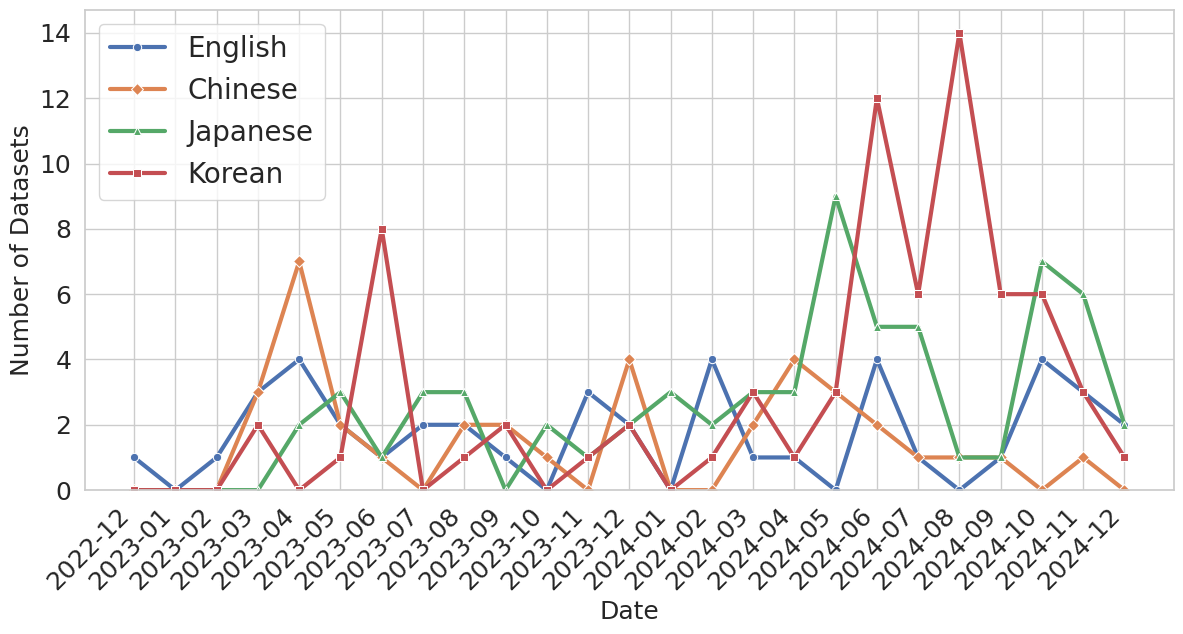

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

INSTRUCT_KEYWORDS = ['instruct', 'instruction', 'dolly', 'alpaca', 'vicuna', 'command']

def find_instruction_datasets(df):
    instruction_mask = df.apply(
        lambda row: any(
            kw in str(row['id']).lower() or 
            kw in str(row['description']).lower() or 
            kw in str(row['tags']).lower() or
            kw in str(row['tasks']).lower() 
            for kw in INSTRUCT_KEYWORDS
        ), axis=1
    )
    
    return df[instruction_mask]

instruct_en = find_instruction_datasets(df_en)
instruct_ko = find_instruction_datasets(df_ko)
instruct_ja = find_instruction_datasets(df_ja)
instruct_zh = find_instruction_datasets(df_zh)
print(len(instruct_en))
print(len(instruct_ko))
print(len(instruct_ja))
print(len(instruct_zh))

def process_dates(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    date_range = pd.period_range(start='2022-12', end='2024-12', freq='M')
    monthly = df.groupby(df['created_at'].dt.to_period('M')).size()
    
    monthly_full = pd.Series(0, index=date_range)
    monthly_full.update(monthly)
    
    return pd.DataFrame({'date': date_range.astype(str), 'count': monthly_full.values})

en_monthly = process_dates(instruct_en)
ko_monthly = process_dates(instruct_ko)
ja_monthly = process_dates(instruct_ja)
zh_monthly = process_dates(instruct_zh)
plt.rcParams['font.family'] = 'serif'

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6.5))

sns.lineplot(data=en_monthly, x='date', y='count', label='English', marker='o', linewidth=3)
sns.lineplot(data=zh_monthly, x='date', y='count', label='Chinese', marker='D', linewidth=3)
sns.lineplot(data=ja_monthly, x='date', y='count', label='Japanese', marker='^', linewidth=3)
sns.lineplot(data=ko_monthly, x='date', y='count', label='Korean', marker='s', linewidth=3)

plt.ylim(0, plt.gca().get_ylim()[1] * 1.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Datasets', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20, loc='upper left')
plt.tight_layout() 
plt.savefig('./figures/instruction_trends.pdf', facecolor='white', edgecolor='none', dpi=300)
plt.show()


## License Distribution

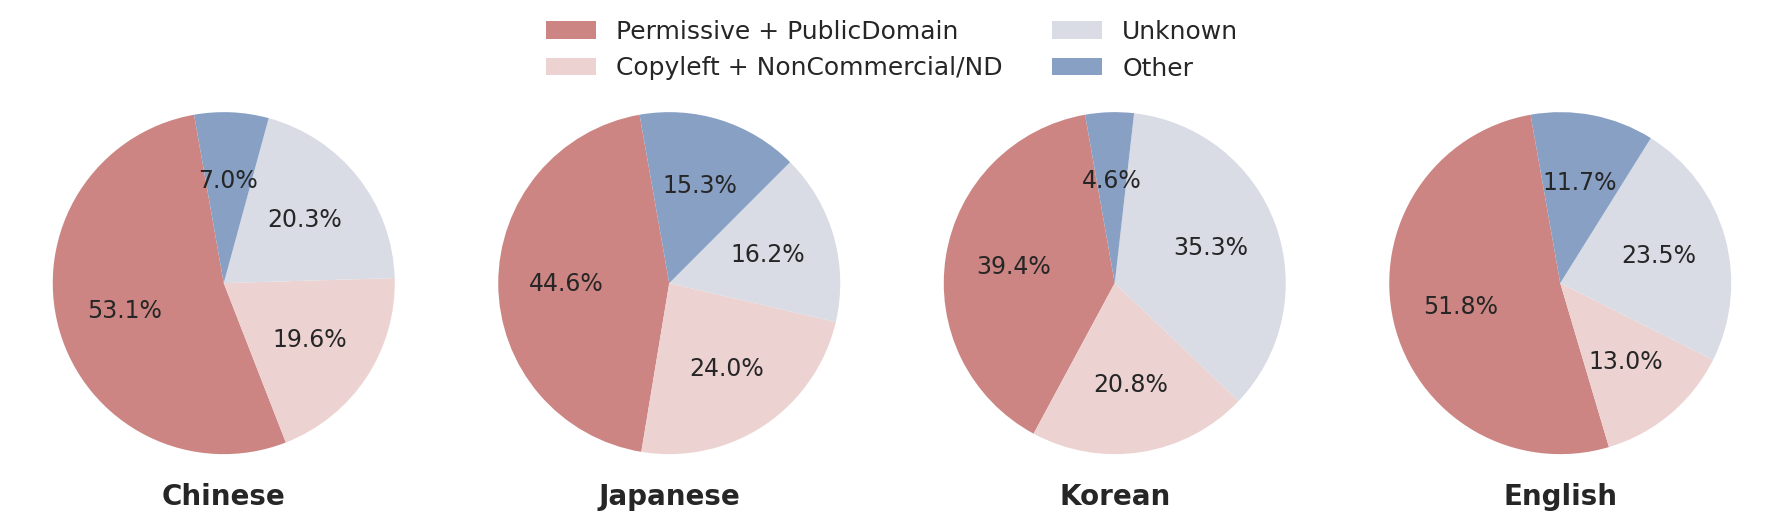

In [22]:
def license_to_category(lic):
    if not isinstance(lic, str) or not lic.strip():
        return "Unknown"
    
    lic_lower = lic.lower().strip()

    # Permissive
    if any(x in lic_lower for x in ["apache", "mit", "bsd", "bsd-3-clause",
                                    "cdla-permissive", "cdla-permissive-2.0", "mpl-2.0",
                                    "cc-by-2.0", "cc-by-3.0", "cc-by-4.0"]):
        return "Permissive"

    # Public Domain
    if any(x in lic_lower for x in ["cc0", "pddl", "odc-by", "odbl", "wtfpl"]):
        return "PublicDomain"

    # Copyleft/ShareAlike
    if any(x in lic_lower for x in ["gpl", "lgpl", "gfdl",  
                                    "cc-by-sa", "cdla-sharing", "openrail"]):
        return "Copyleft/ShareAlike"

    # NonCommercial / ND
    if "cc-by-nc" in lic_lower or "cc-by-nd" in lic_lower:
        return "NonCommercial/ND"

    # other
    return "Other"

df_zh["license_cat"] = df_zh["license"].apply(license_to_category)
df_ja["license_cat"] = df_ja["license"].apply(license_to_category)
df_ko["license_cat"] = df_ko["license"].apply(license_to_category)
df_en["license_cat"] = df_en["license"].apply(license_to_category)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

colors = sns.color_palette("vlag_r", n_colors=4) 

labels = ["Permissive + PublicDomain", "Copyleft + NonCommercial/ND", "Unknown", "Other"]

df_languages = {
    "Chinese": df_zh["license_cat"].dropna(),
    "Japanese": df_ja["license_cat"].dropna(),
    "Korean": df_ko["license_cat"].dropna(),
    "English": df_en["license_cat"].dropna(),
}

fig, axes = plt.subplots(1, 4, figsize=(18, 5.5))

for i, (lang, licenses) in enumerate(df_languages.items()):
    total = len(licenses)
    permissive_public = licenses.isin(["Permissive", "PublicDomain"]).sum() / total * 100
    restricted = licenses.isin(["Copyleft/ShareAlike", "NonCommercial/ND"]).sum() / total * 100
    unknown = licenses.isin(["Unknown"]).sum() / total * 100
    other = licenses.isin(["Other"]).sum() / total * 100

    sizes = [permissive_public, restricted, unknown, other]

    wedges, texts, autotexts = axes[i].pie(
        sizes, autopct="%.1f%%", colors=colors, startangle=100, 
        wedgeprops={'edgecolor': 'none'}, textprops={'fontsize': 20}  # 🔹 외곽선 제거, 폰트 크기 증가
    )

    for text in autotexts:
        text.set_fontsize(17)

    axes[i].set_xlabel(lang, fontsize=20, fontweight="bold", labelpad=-10)

fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=18, frameon=False)

plt.subplots_adjust(wspace=0.1, top=0.85, bottom=0.15)  
plt.tight_layout()
plt.savefig('./figures/license_distribution.pdf', facecolor='white', edgecolor='none', dpi=300)
plt.show()


## Arxiv Distrivution

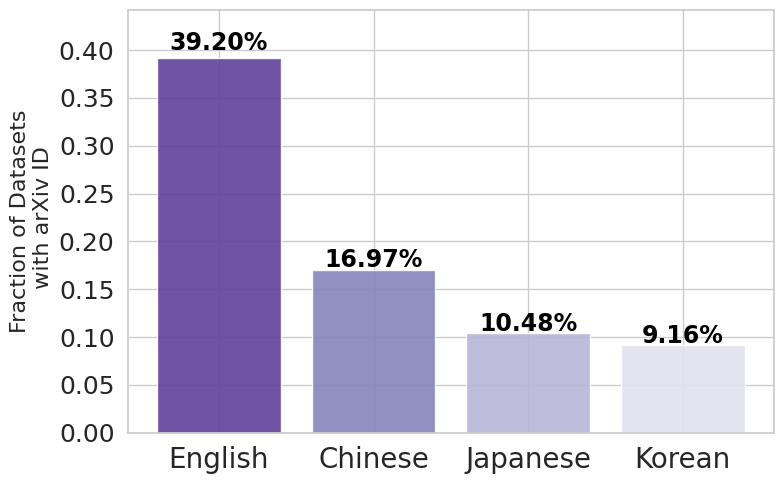

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

arxiv_distribution = {}

for lang, df in { "English": df_en, "Chinese": df_zh, "Japanese": df_ja, "Korean": df_ko}.items():
    total = len(df)
    count_none = df['arxiv_id'].isna().sum()
    count_not_none = df['arxiv_id'].notna().sum()
    
    arxiv_distribution[lang] = {
        "With arXiv ID": count_not_none / total * 100,
        "Without arXiv ID": count_none / total * 100,
    }

df_arxiv_distribution = pd.DataFrame(arxiv_distribution).T
df_arxiv_with = df_arxiv_distribution[["With arXiv ID"]].copy()
df_arxiv_with["With arXiv ID"] /= 100 

y_max = min(1, df_arxiv_with["With arXiv ID"].max() + 0.05)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

bar_colors = sns.color_palette("Purples_r", n_colors=len(df_arxiv_with))  
langs = df_arxiv_with.index.tolist() 
means = df_arxiv_with["With arXiv ID"].values  

bars = plt.bar(langs, means, capsize=0, color=bar_colors, alpha=0.9)  

plt.ylabel('Fraction of Datasets\n with arXiv ID', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.ylim(0, y_max)  

for bar, v in zip(bars, means):
    height = bar.get_height()
    offset = height * 0.02 
    plt.text(bar.get_x() + bar.get_width() / 2, height + offset, f"{v:.2%}", 
             ha='center', fontsize=17, fontweight='bold', color="black")

plt.tight_layout()
plt.savefig('./figures/arxiv_distribution.pdf', facecolor='white', edgecolor='none', dpi=300)
plt.show()
